<a href="https://colab.research.google.com/github/Krylze/Data-Behavior-Patterns/blob/main/Mineria_de_datos_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

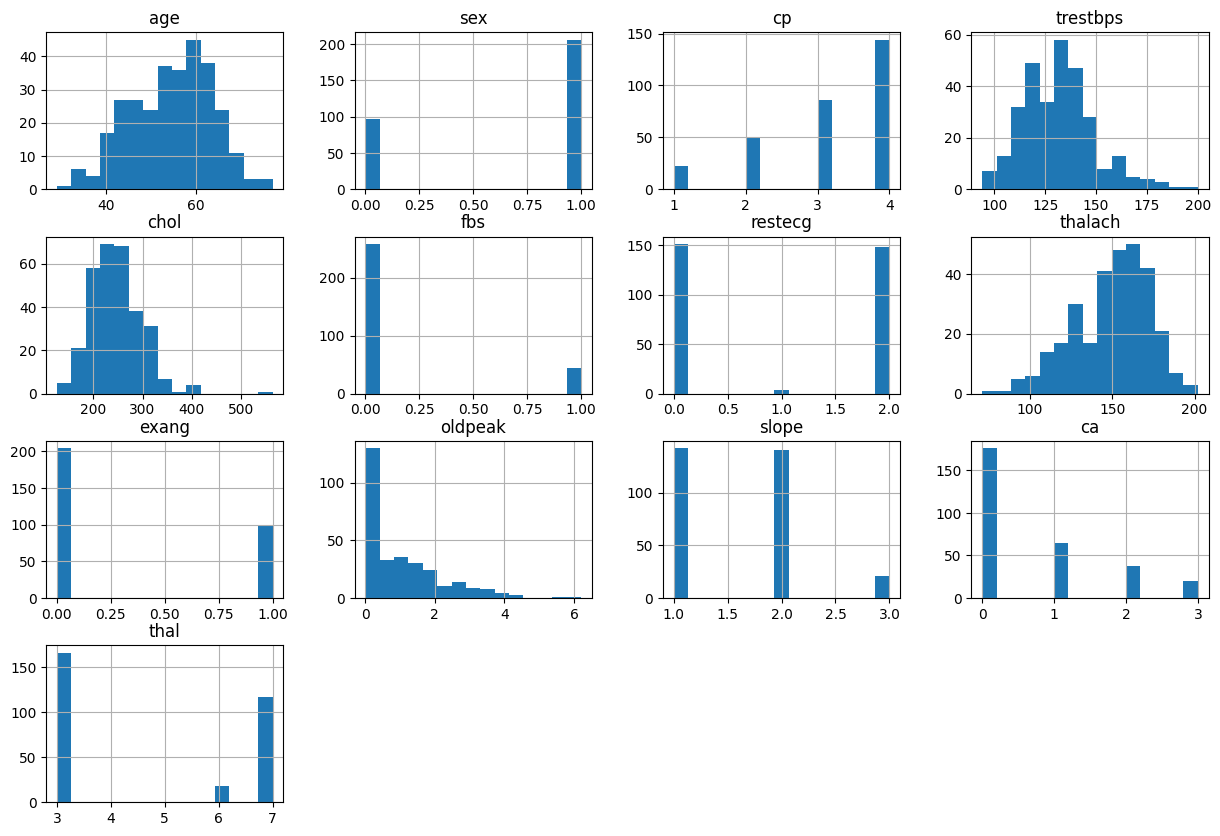

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Análisis descriptivo
print(X.describe())

# Visualización
X.hist(bins=15, figsize=(15, 10))
plt.show()

In [ ]:
X.isnull().sum()  # Verificar valores faltantes
X.fillna(X.mean(), inplace=True)  # Imputar con la media

<ipython-input-6-526a2a81e950>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Imputar con la media


In [ ]:
X = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_scaled)

In [ ]:
import numpy as np

X_log_transformed = np.log1p(X_normalized)  # log(1 + x) para evitar log(0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # Cambie el grado según sea necesario
X_poly = poly.fit_transform(X_log_transformed)

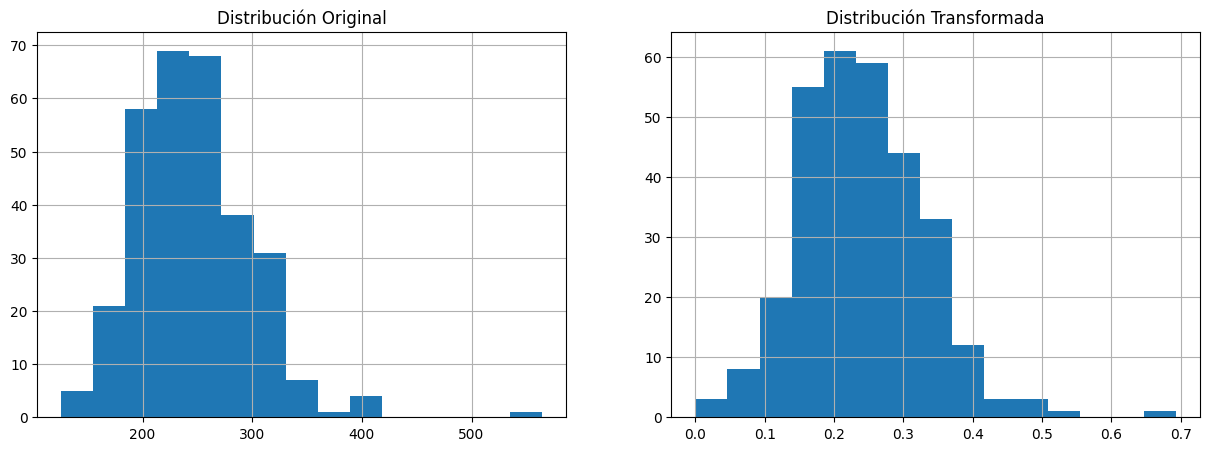

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (your previous code for data preprocessing) ...

# Assuming 'chol' is the feature you want to plot, and it's the 3rd column (index 2) in your original DataFrame X
feature_index = np.where(X.columns == 'chol')[0][0]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Distribución Original')
X['chol'].hist(bins=15)

plt.subplot(1, 2, 2)
plt.title('Distribución Transformada')
pd.Series(X_log_transformed[:, feature_index]).hist(bins=15)
plt.show()